#  Analiza Official Singles Charta UK Top 40

V Jupyter Notebooku bomo analizirali podatke, ki smo jih s pomočjo scrapperja pridobili iz Official Singles Chart UK Top 40 in shranili v uk_top_40.csv za zadnjih 5 let. Ta lestvica rangira najbolj predvajane pesmi (radio, spotify, apple music, youtube, ...) v UK in izhaja enkrat tedensko za pretekli teden. S spletne strani sem uspel izluščiti podatke o naslovih pesmi, njihovih avtorjih, datumu, ko so bile na lestvici, poziciji na lestvici, številu tednih na lestvici in najvišji poziciji na lestvici.

# Nalaganje pandas in matplotlib ter podatkov

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib

# Naložimo podatke
df = pd.read_csv('uk_top_40.csv')
df['datum'] = pd.to_datetime(df['datum'], format='%Y%m%d', errors='coerce')

# Nastavimo, da se ne vidi "index" stolpca
df.head(10)

,datum,pozicija,naslov,izvajalec,tedni_na_lestvici,najvisja_pozicija
0,2020-08-30,1,HEAD & HEART,JOEL CORRY FT MNEK,8,1
1,2020-08-30,2,WAP,CARDI B FT MEGAN THEE STALLION,3,2
2,2020-08-30,3,DYNAMITE,BTS,1,3
3,2020-08-30,4,AIN'T IT DIFFERENT,HEADIE ONE/AJ TRACEY/STORMZY,1,4
4,2020-08-30,5,LIGHTER,NATHAN DAWE FT KSI,5,3
5,2020-08-30,6,LAUGH NOW CRY LATER,DRAKE FT LIL DURK,2,4
6,2020-08-30,7,MOOD SWINGS,POP SMOKE FT LIL TJAY,7,6
7,2020-08-30,8,WATERMELON SUGAR,HARRY STYLES,29,4
8,2020-08-30,9,WEST TEN,AJ TRACEY & MABEL,8,5
9,2020-08-30,10,GREECE,DJ KHALED FT DRAKE,6,8


Tukaj uvozimo vse potrebne pakete in naložimo podatke s katerimi bomo delali. Olepševanje tabele ni potrebno, saj sem to zajel že v scrapperju.

## Uvoz funkcij iz `analiza_funkcije.py`

In [122]:
from analiza_funkcije import (
    top_n_izvajalci,
    top_pesmi_po_tednih,
    top_pesmi_po_najvisji,
    pesmi_izvajalca,
    najvecji_skoki,
    trajektorija_pesmi,
    pie_porazdelitev_tednov
)

Uvozimo vse funkcije potrebne za našo analizo iz python fila analiza_funkcije.py, ki sem ga zaradi preglednosti spisal posebej.

## Top izvajalci (tabela + graf)

,izvajalec,stevilo_pojavitev
0,ED SHEERAN,208
1,TAYLOR SWIFT,182
2,BILLIE EILISH,163
3,TATE MCRAE,154
4,SABRINA CARPENTER,151
5,CHAPPELL ROAN,142
6,BENSON BOONE,141
7,TEDDY SWIMS,140
8,OLIVIA RODRIGO,137
9,HARRY STYLES,135


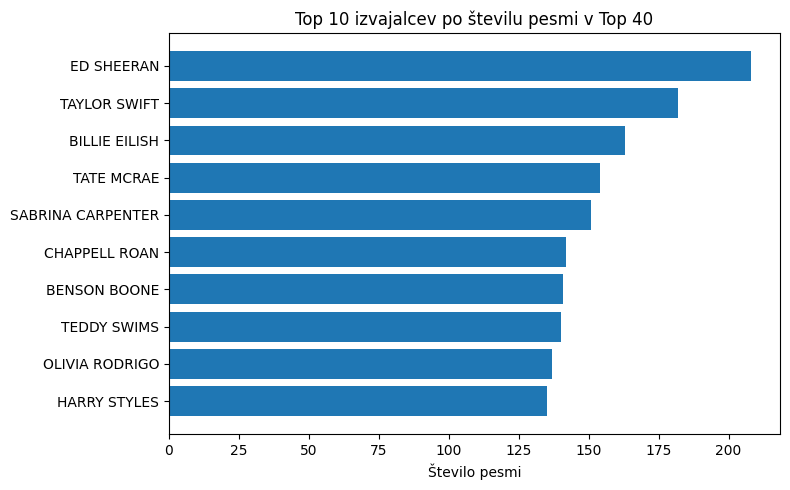

In [123]:
top10 = top_n_izvajalci(df, 10)
display(top10)

plt.figure(figsize=(8,5))
plt.barh(top10['izvajalec'][::-1], top10['stevilo_pojavitev'][::-1])
plt.title('Top 10 izvajalcev po številu pesmi v Top 40')
plt.xlabel('Število pesmi')
plt.tight_layout()
plt.show()

Po vrsti urejenih 10 izvajalcev z največjim številom pesmi, ki so se uvrstile na lestvico v zadnjih petih letih ter to prikazano z grafom.    
To nam v resnici pokaže 10 najbolj popularnih izvajalcev v zadnjih 5 letih v UK.

## Pesmi z največ tedni na lestvici (tabela)

In [124]:
top_tedni = top_pesmi_po_tednih(df, 15)
display(top_tedni)

,datum,pozicija,naslov,izvajalec,tedni_na_lestvici,najvisja_pozicija
7110,2024-01-07,31,MR BRIGHTSIDE,KILLERS,391,10
9121,2024-12-29,2,ALL I WANT FOR CHRISTMAS IS YOU,MARIAH CAREY,139,1
9125,2024-12-29,6,FAIRYTALE OF NEW YORK,POGUES FT KIRSTY MACCOLL,133,2
6069,2023-07-09,30,HEAT WAVES,GLASS ANIMALS,132,5
9145,2024-12-29,26,MERRY XMAS EVERYBODY,SLADE,124,1
9515,2025-03-02,36,WHATEVER,OASIS,113,3
9128,2024-12-29,9,DO THEY KNOW IT'S CHRISTMAS,BAND AID,111,1
6837,2023-11-19,38,POMPEII,BASTILLE,109,2
2958,2022-01-09,39,BLINDING LIGHTS,WEEKND,106,1
9120,2024-12-29,1,LAST CHRISTMAS,WHAM,105,1


Seznam pesmi, ki so se na lestvici pojavile vsaj enkrat v zadnjih petih letih, ki so bile vse skupaj največkrat uvrščene na lestvico (ne samo v zadnjih petih letih!).  Vidimo da je veliko izmed pesmi starejših, saj so to pesmi (kot npr. All I Want For Christmas Is You in Last Christmas), ki se na lestvici pojavijo ponovno zaradi popularnosti v nekem obdobju (npr. božič).

## Pesmi z najboljšo najvišjo pozicijo (tabela)

In [125]:
top_best = top_pesmi_po_najvisji(df, 15)
display(top_best)

,datum,pozicija,naslov,izvajalec,tedni_na_lestvici,najvisja_pozicija
0,2020-08-30,1,HEAD & HEART,JOEL CORRY FT MNEK,8,1
4962,2023-01-01,3,MERRY CHRISTMAS,ED SHEERAN & ELTON JOHN,10,1
4970,2023-01-01,11,DO THEY KNOW IT'S CHRISTMAS,BAND AID,99,1
4974,2023-01-01,15,MERRY CHRISTMAS EVERYONE,SHAKIN' STEVENS,90,1
4985,2023-01-01,26,MERRY XMAS EVERYBODY,SLADE,114,1
5000,2023-01-08,1,ESCAPISM,RAYE FT 070 SHAKE,7,1
5001,2023-01-08,2,ANTI-HERO,TAYLOR SWIFT,11,1
5012,2023-01-08,13,UNHOLY,SAM SMITH & KIM PETRAS,15,1
5015,2023-01-08,16,I'M GOOD (BLUE),DAVID GUETTA & BEBE REXHA,19,1
5018,2023-01-08,19,AS IT WAS,HARRY STYLES,40,1


Po vrsti urejene pesmi, glede na najvišje mesto, ki so ga zasedle. Seveda je prikazanih samo nekaj pesmi, ki so v zadnjih petih letih v nekem tednu zavzele #1 pozicijo. Teh skladb je v resnici precej več, saj imamo podatke za zadnjih 5 let (5*52=260 tednov), prikazujemo pa samo 20 skladb.

## Pesmi za izbranega izvajalca

In [130]:
summary = pesmi_izvajalca(df, 'Kendrick Lamar')  
summary.head(15)

,naslov,pojavitve,povp_poz,najvisja,max_tedni
7,NOT LIKE US,21,12.809524,1,30
8,SQUABBLE UP,2,15.500000,4,2
4,LUTHER,14,19.857143,4,16
1,ALL THE STARS,5,11.200000,5,27
6,N95,3,20.333333,6,3
10,TV OFF,4,25.500000,6,6
2,DIE HARD,4,21.250000,7,4
3,EUPHORIA,3,22.666667,11,4
11,UNITED IN GRIEF,1,14.000000,14,1
9,THE HEART - PT 5,1,24.000000,24,1


Ta funkcija nam vrne vse pesmi nekega izvajalca, ki so se v zadnjih petih letih pojavile na lestvici.

## Največji tedenski dvigi/padci (zadnji teden v podatkih)

In [131]:
zadnji = df['datum'].max()
risers, fallers = najvecji_skoki(df, zadnji)
print('Zadnji teden:', zadnji.date())
print('Top dvigi:')
display(risers)
print('Top padci:')
display(fallers)

Zadnji teden: 2025-08-24
Top dvigi:


,naslov,izvajalec,pozicija_prev,pozicija_cur,sprememba
20,JUMP,BLACKPINK,28,22,6
7,NICE TO EACH OTHER,OLIVIA DEAN,14,9,5
29,TAKEDOWN,TWICE,35,31,4
25,DEALER,LOLA YOUNG,31,27,4
18,PINK PONY CLUB,CHAPPELL ROAN,23,20,3
2,SODA POP,SAJA BOYS/ANDREW CHOI/NECKWAV,6,3,3
12,12 TO 12,SOMBR,17,14,3
9,IN ME IN,SAM FENDER & OLIVIA DEAN,13,11,2
22,BACK TO FRIENDS,SOMBR,26,24,2
26,SPARKS,COLDPLAY,30,28,2


Top padci:


,naslov,izvajalec,pozicija_prev,pozicija_cur,sprememba
30,BEAUTIFUL THINGS,BENSON BOONE,10,32,-22
24,A LITTLE MORE,ED SHEERAN,18,26,-8
34,CIGARETTES & ALCOHOL,OASIS,34,39,-5
28,BLESSINGS,CALVIN HARRIS/DOUGLAS,25,30,-5
33,APT,ROSE & BRUNO MARS,33,37,-4
13,YUKON,JUSTIN BIEBER,12,15,-3
10,SAPPHIRE,ED SHEERAN,9,12,-3
15,ETERNITY,ALEX WARREN,15,17,-2
11,VICTORY LAP,FRED AGAIN/SKEPTA/PLAQUEBOYMAX,11,13,-2
8,ORDINARY,ALEX WARREN,8,10,-2


S pomočjo funkcije, ki izračuna razliko v poziciji pesmi med zadnjim in predzadnjim tednom scrappanih podatkov, lahko vidimo katera pesem se je najbolj povzpela/padla.    
 Tu seveda ne upoštevamo pesmi, ki so bile na lestvici samo en od obeh gledanih tednov, saj za njih nimamo obeh potrebnih podatkov za izračun.

## Trajektorija izbrane pesmi (primer)

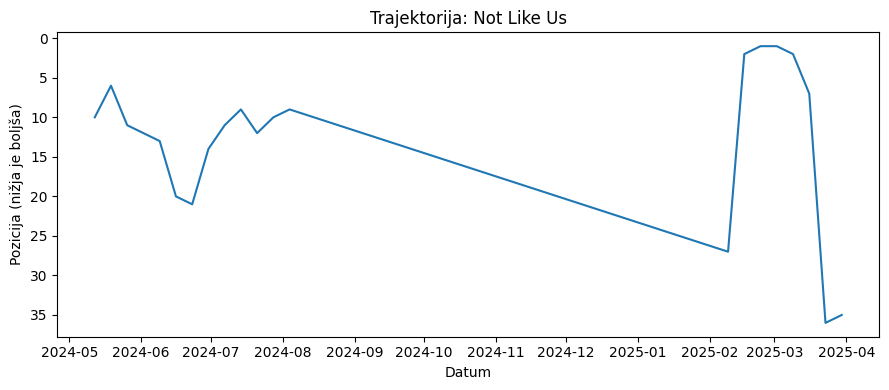

In [132]:
trajektorija_pesmi(df, 'Not Like Us')

Prikaz gibanja izbrane pesmi po lestvici v času, ko je bila na lestvici.

# Pie chart porazdelitve pesmi po številu tednov na lestvici

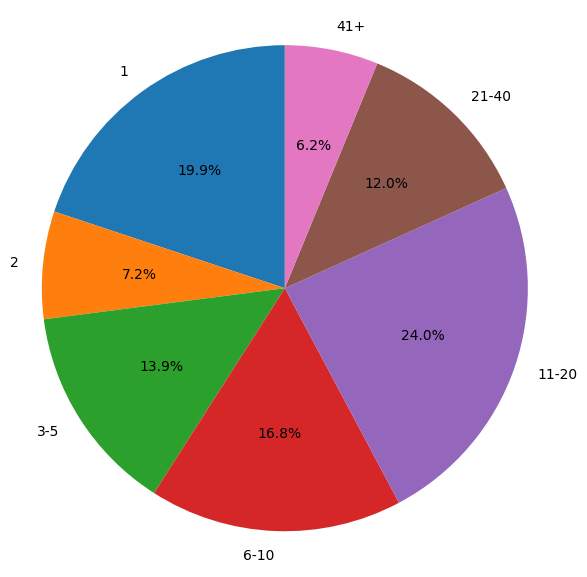

,tedni_na_lestvici,count
0,1,253
1,2,91
2,3-5,177
3,6-10,214
4,11-20,305
5,21-40,153
6,41+,79


In [133]:
stevilo = pie_porazdelitev_tednov(df)
display(stevilo)  

Tu smo želeli pokazati, kolikšen del pesmi je bil na lestvici neko obdobje časa. Vidimo da je 19,9% pesmi bilo na lestvici le en teden, medtem ko je bilo na lestvici 41 ali več tednov le 6,2% pesmi, kar ima smisel saj veliko pesmi v današnjem času "blowa up" le za krajše obdobje, medtem ko je manj pesmi, ki so popularne dlje časa.  
Iz tega lahko razberemo tudi s koliko pesmimi dejansko delamo, saj vidimo da imamo, kljub temu da imamo v csv preko 10000 pobranih pesmi, le 253+91+177+214+305+153+79 = 1272 pesmi, ki se z izjemo 253ih, ki so bile na lestvici v zadnjih petih letih le enkrat, ponavljajo.

# Zaključek

Analiza podatkov UK Top 40 je pokazala, kateri izvajalci so v zadnjih letih najbolj prisotni na lestvici in katere pesmi so bile najbolj popularne najdlje. Pregled povprečnih pozicij in najvišjih uvrstitev razkriva tudi, kdo je dosegal največje uspehe na vrhu. S primerjavo tednov smo odkrili največje skoke in padce, tortni diagram trajanja pa potrjuje, da se večina pesmi na lestvici zadrži le kratek čas, medtem ko le redke vztrajajo več deset tednov.

Projekt tako lepo pokaže priljubljenosti pesmi in omogoča hiter in enostaven vpogled v glasbene trende v Združenem kraljestvu v zadnjih 5 letih.